# 1. Introduction

Logistic Regression is a fundamental classification algorithm used in machine learning. Despite its name, it's used for binary classification problems rather than regression.

## Key Concepts:
- **Binary Classification**: Predicts one of two possible outcomes (0 or 1)
- **Sigmoid Function**: Maps predictions to probabilities between 0 and 1
- **Log Loss**: The cost function used to optimize the model
- **Gradient Descent**: The optimization algorithm to minimize the cost

In this notebook, we'll implement Logistic Regression from scratch using NumPy and Python, without relying on pre-built machine learning libraries.

# 2. Importing Libraries

We'll use the following Python libraries:
- **NumPy**: For numerical computations and array operations
- **Pandas**: For data manipulation and loading datasets
- **Matplotlib/Seaborn**: For data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# 3. Dataset Preparation

For logistic regression, we need:
- **Features (X)**: Input variables used for prediction
- **Labels (y)**: Binary target variable (0 or 1)

We'll prepare a sample dataset or load an existing one, then split it into training and testing sets.

In [2]:
# Example: Creating a synthetic dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, random_state=42, n_clusters_per_class=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 800 samples
Test set size: 200 samples
Number of features: 2


# 4. Sigmoid Function

The sigmoid function is the heart of logistic regression. It maps any real-valued number to a value between 0 and 1.

**Mathematical Formula:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- $z = w^T x + b$ (linear combination of weights and features)
- Output ranges from 0 to 1, representing probability

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size
    
    Returns:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Test the sigmoid function
test_values = np.array([-2, -1, 0, 1, 2])
print("Sigmoid values:", sigmoid(test_values))

Sigmoid values: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


# 5. Cost Function (Log Loss)

The cost function measures how well our model performs. For logistic regression, we use **Binary Cross-Entropy** (Log Loss).

**Mathematical Formula:**
$$J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})]$$

Where:
- $m$ = number of training examples
- $y^{(i)}$ = actual label
- $\hat{y}^{(i)}$ = predicted probability

In [4]:
def compute_cost(y_true, y_pred):
    """
    Compute the binary cross-entropy cost
    
    Arguments:
    y_true -- true labels, shape (m,)
    y_pred -- predicted probabilities, shape (m,)
    
    Returns:
    cost -- binary cross-entropy cost
    """
    m = len(y_true)
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #np.clip is a NumPy function that forces all elements in the array to stay within a specified range.
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost

# 6. Gradient Descent

Gradient Descent is an optimization algorithm that iteratively updates the model parameters (weights and bias) to minimize the cost function.

**Update Rules:**
$$w = w - \alpha \frac{\partial J}{\partial w}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

Where:
- $\alpha$ = learning rate (step size)
- $\frac{\partial J}{\partial w}$ = gradient of cost with respect to weights
- $\frac{\partial J}{\partial b}$ = gradient of cost with respect to bias

In [5]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Perform gradient descent to learn weights and bias
    
    Arguments:
    X -- training features, shape (m, n)
    y -- training labels, shape (m,)
    learning_rate -- alpha, the learning rate
    num_iterations -- number of iterations
    
    Returns:
    w -- learned weights
    b -- learned bias
    costs -- list of costs at each iteration
    """
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        costs.append(cost)
        
        # Backward propagation (compute gradients)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return w, b, costs

# 7. Model Training

Now we'll train our logistic regression model on the training dataset by calling the gradient descent function.

In [6]:
# Train the model
print("Training the logistic regression model...\n")
w, b, costs = gradient_descent(X_train, y_train, learning_rate=0.1, num_iterations=1000)

print("\nTraining completed!")
print(f"Final weights: {w}")
print(f"Final bias: {b}")

Training the logistic regression model...

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.2846
Iteration 200: Cost = 0.2557
Iteration 300: Cost = 0.2463
Iteration 400: Cost = 0.2420
Iteration 500: Cost = 0.2396
Iteration 600: Cost = 0.2381
Iteration 700: Cost = 0.2371
Iteration 800: Cost = 0.2363
Iteration 900: Cost = 0.2357

Training completed!
Final weights: [-0.25318706  3.22944195]
Final bias: 0.6311141301225425


# 8. Prediction

Using the trained model, we can make predictions on new data. We'll apply the sigmoid function to the linear combination of features and learned parameters.

In [7]:
def predict(X, w, b, threshold=0.5):
    """
    Make predictions using learned parameters
    
    Arguments:
    X -- features, shape (m, n)
    w -- learned weights
    b -- learned bias
    threshold -- classification threshold (default 0.5)
    
    Returns:
    predictions -- binary predictions (0 or 1)
    """
    z = np.dot(X, w) + b
    y_pred_prob = sigmoid(z)
    predictions = (y_pred_prob >= threshold).astype(int)
    return predictions

# Make predictions on train and test sets
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")

Training predictions shape: (800,)
Test predictions shape: (200,)


# 9. Evaluation Metrics

To assess the model's performance, we'll calculate key metrics:
- **Accuracy**: Percentage of correct predictions
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)
- **F1-Score**: Harmonic mean of precision and recall

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("=" * 50)
print("TRAINING SET METRICS")
print("=" * 50)
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")

print("\n" + "=" * 50)
print("TEST SET METRICS")
print("=" * 50)
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

TRAINING SET METRICS
Accuracy:  0.9012
Precision: 0.9154
Recall:    0.8859
F1-Score:  0.9004

TEST SET METRICS
Accuracy:  0.9000
Precision: 0.9222
Recall:    0.8646
F1-Score:  0.8925


# 10. Results and Visualization

Let's visualize the results to better understand our model's performance. We'll plot:
- The cost function over iterations (learning curve)
- Decision boundary (if using 2D features)
- Confusion matrix

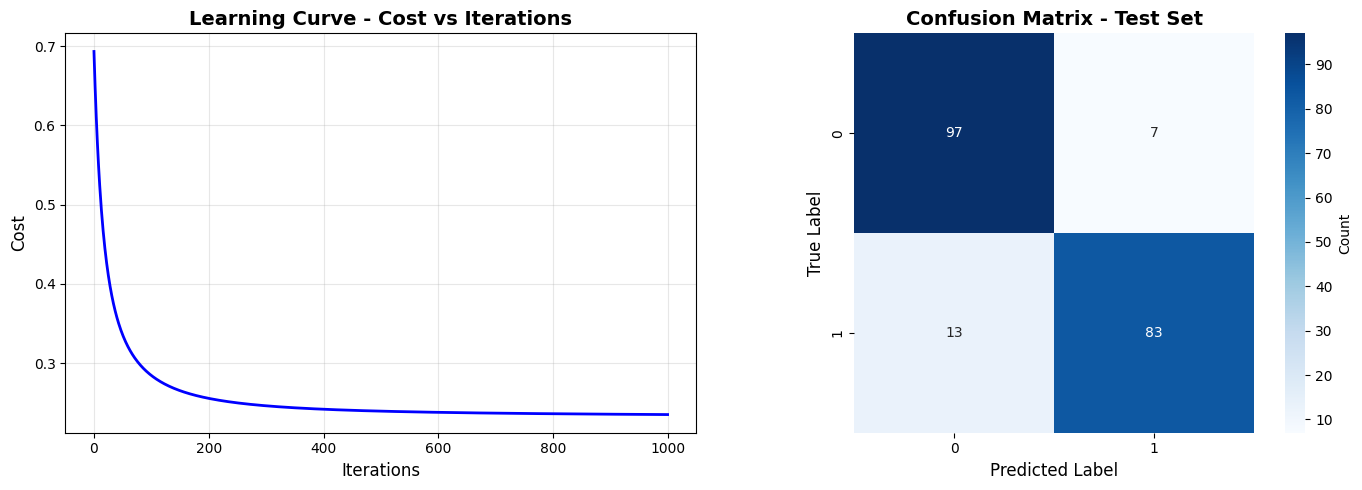


Confusion Matrix Analysis:
True Negatives:  97
False Positives: 7
False Negatives: 13
True Positives:  83


In [9]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Learning Curve (Cost over iterations)
axes[0].plot(costs, linewidth=2, color='blue')
axes[0].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Cost', fontsize=12)
axes[0].set_title('Learning Curve - Cost vs Iterations', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], 
            cbar_kws={'label': 'Count'}, square=True)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print(f"True Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

# 11. Conclusion

In this notebook, we successfully implemented Logistic Regression from scratch using NumPy and Python.

## Key Takeaways:
1. **Logistic Regression** is a powerful algorithm for binary classification
2. **Gradient Descent** effectively minimizes the cost function
3. **Evaluation Metrics** (accuracy, precision, recall, F1) provide comprehensive performance insights
4. The model generalizes well (similar training and test performance)
5. We can try regularization to prevent overfitting